In [8]:
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('earthquakes.csv')
df = df[df['Date'].str.contains('/')]
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by=['Date'])
df = df[ df['Type'] == 'Earthquake' ]
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,1965-01-02,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,1965-01-04,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,1965-01-05,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,1965-01-08,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,1965-01-09,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [10]:
lat_managua = 12.1364
lon_managua = -86.2514

# quantos graus de latitude/longitude para cada direcao
delta = 5.0

north_limit = lat_managua + delta
south_limit = lat_managua - delta
east_limit = lon_managua + delta
west_limit = lon_managua - delta

df_limitado = df[
    (df['Latitude'] <= north_limit) & 
    (df['Latitude'] >= south_limit) & 
    (df['Longitude'] <= east_limit) & 
    (df['Longitude'] >= west_limit)
]
df_limitado.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
141,1965-05-03,10:01:38,13.683,-89.070,Earthquake,15.0,NaN,NaN,5.9,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM856602,ISCGEM,ISCGEM,ISCGEM,Automatic
330,1965-12-15,23:05:25,7.650,-81.913,Earthquake,25.0,NaN,NaN,6.3,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM851774,ISCGEM,ISCGEM,ISCGEM,Automatic
398,1966-03-27,18:53:41,8.865,-83.467,Earthquake,25.0,NaN,NaN,5.7,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM849641,ISCGEM,ISCGEM,ISCGEM,Automatic
407,1966-04-09,02:42:09,9.409,-84.282,Earthquake,25.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM848237,ISCGEM,ISCGEM,ISCGEM,Automatic
766,1967-10-03,18:16:07,10.878,-85.964,Earthquake,30.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM829954,ISCGEM,ISCGEM,ISCGEM,Automatic


In [11]:
n_of_earthquakes = len(df_limitado)
time_elapsed = df_limitado['Date'].iloc[-1] - df_limitado['Date'].iloc[0]
months_elapsed = time_elapsed.days / 30

monthly_avg = n_of_earthquakes / months_elapsed
monthly_avg

0.5712012728719172

In [12]:
mu = 1 / monthly_avg
sigma = 1 / (monthly_avg ** 2)
# * não entendi pq tenho que fazer o sigma_mu se é igual ao mu
sigma_mu = st.expon.std(scale=mu)

print('mu: ', mu)
print('sigma_mu: ', sigma_mu)
print('sigma: ', sigma)

mu:  1.7506963788300836
sigma_mu:  1.7506963788300836
sigma:  3.0649378108487677


In [13]:
lower = st.expon.ppf(0.025, scale=mu)
upper = st.expon.ppf(0.975, scale=mu)

print('lower: ', lower)
print('upper: ', upper)

lower:  0.04432379475801167
upper:  6.458107902257962


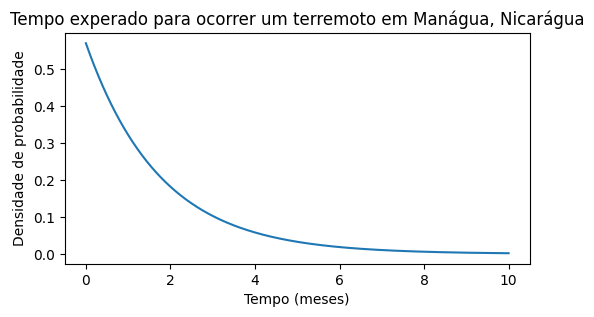

In [25]:
# Gráfico
x = np.linspace(0, 10, 1000)
y = st.expon.pdf(x, scale=mu)

plt.figure(figsize=(6, 3))
plt.title('Tempo experado para ocorrer um terremoto em Manágua, Nicarágua')
plt.xlabel('Tempo (meses)')
plt.ylabel('Densidade de probabilidade')
plt.plot(x, y)
plt.show()